<a href="https://colab.research.google.com/github/YMGYM/TSE_Learning/blob/master/Object_Detection_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
<p> 이미지 검출 관련 연습 파일입니다. </p>
[이곳](https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/01_00_What_is_Object_Detection.html)
을 참고했습니다.

[이곳](https://www.kaggle.com/aruchomu/yolo-v3-object-detection-in-tensorflow)
도 참고했습니다.

#PASCAL VOC

데이터셋의 구조를 파악

In [1]:
!tar -xf /content/drive/My\ Drive/Datasets/PASCAL.tar

## Load Image

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw

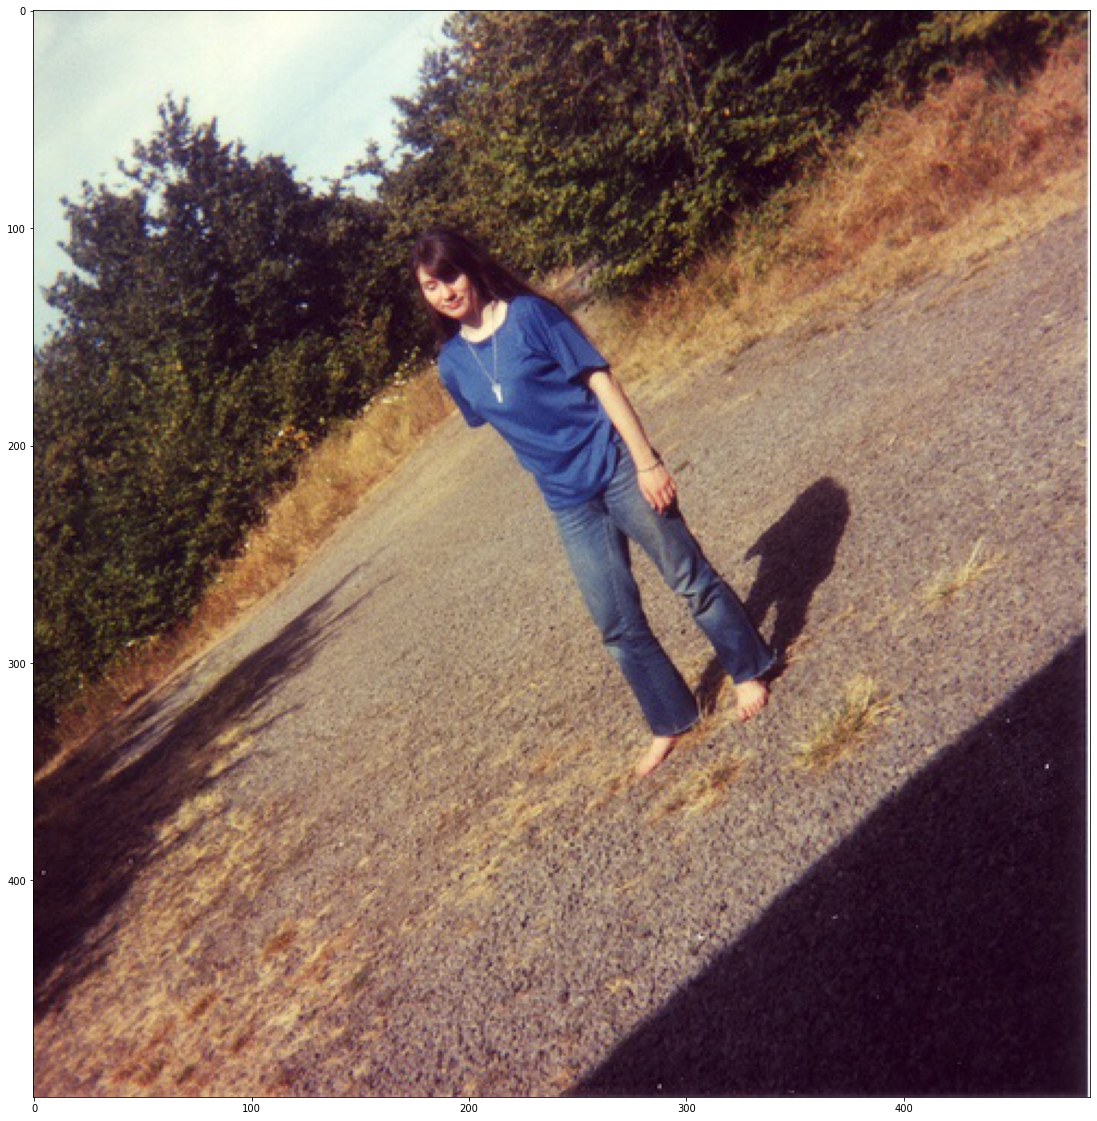

In [ ]:
image = Image.open('/content/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg').convert('RGB')

plt.figure(figsize = (25,20))
plt.imshow(image)
plt.show()
plt.close()

## Parse XML

In [11]:
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

In [14]:
xml_path = '/content/VOCdevkit/VOC2012/Annotations/2007_000027.xml'

print("XML parsing start")
xml = open('/content/VOCdevkit/VOC2012/Annotations/2007_000027.xml', "r")
tree = Et.parse(xml)
root = tree.getroot()

size = root.find("size")

width = size.find("width").text
height = size.find('height').text
channels = size.find("depth").text

print("Image properties\nwidth: {}\nheight: {}\nchannels: {}\n".format(width, height, channels))

objects = root.findall("object")
print("objects Description")

for obj in objects:
  name = obj.find("name").text
  bndbox = obj.find("bndbox")
  xmin = bndbox.find("xmin").text
  ymin = bndbox.find("ymin").text
  xmax = bndbox.find("xmax").text
  ymax = bndbox.find("ymax").text

  print("class: {}\nxmin: {}\nxmax: {}\nymin: {}\nymax: {}\n".format(name, xmin, xmax, ymin, ymax))

print("XML parsing END")

XML parsing start
Image properties
width: 486
height: 500
channels: 3

objects Description
class: person
xmin: 174
xmax: 349
ymin: 101
ymax: 351

XML parsing END


## 이미지에 박스 그리기

2011_004423.xml


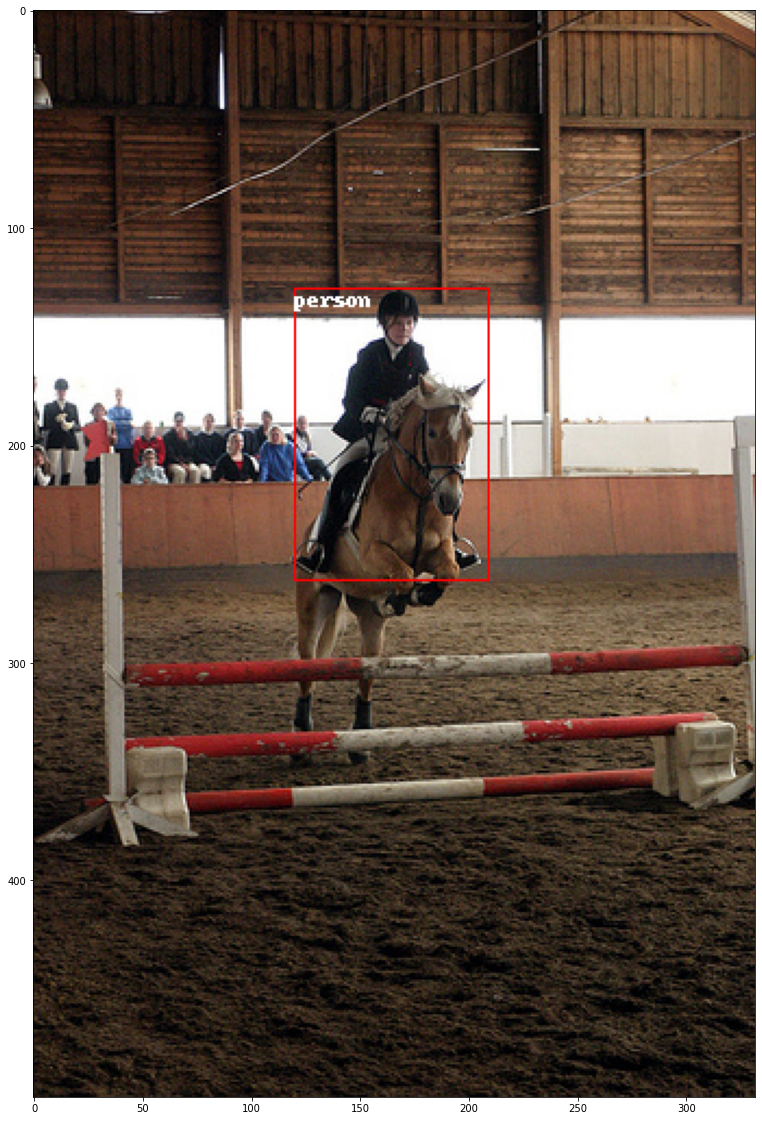

In [35]:
import os

dataset_path = '/content/VOCdevkit/VOC2012'

IMAGE_FOLDER = 'JPEGImages'
ANNOTATIONS_FOLDER = 'Annotations'

ann_root, ann_dir, ann_files = next(os.walk(os.path.join(dataset_path, ANNOTATIONS_FOLDER)))
img_root, img_dir, img_files = next(os.walk(os.path.join(dataset_path, IMAGE_FOLDER)))

for xml_file in ann_files[8:9]:
  # XML 파일과 같은 이름의 jpeg
  print(xml_file)
  img_name = img_files[img_files.index(".".join([xml_file.split(".")[0], "jpg"]))]
  img_file = os.path.join(img_root, img_name)

  image = Image.open(img_file).convert('RGB')
  draw = ImageDraw.Draw(image)

  xml = open(os.path.join(ann_root, xml_file), "r")
  tree = Et.parse(xml)
  root = tree.getroot()

  size = root.find("size")

  width = size.find("width").text
  height = size.find('height').text
  channels = size.find("depth").text

  objects = root.findall("object")

  for obj in objects:
    name = obj.find("name").text
    bndbox = obj.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)

    draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="red")
    draw.text((xmin, ymin), name)

plt.figure(figsize = (25,20))
plt.imshow(image)
plt.show()
plt.close()

In [39]:
my_list = [1,2,3,4]

print(my_list[0])
print(my_list[0:1])

1
[1]


# Convert2YOLO




In [6]:
!unzip /content/drive/My\ Drive/darknet/convert2Yolo.zip -d darknet

Archive:  /content/drive/My Drive/darknet/convert2Yolo.zip
   creating: darknet/convert2Yolo/
  inflating: darknet/__MACOSX/._convert2Yolo  
  inflating: darknet/convert2Yolo/requirements.txt  
  inflating: darknet/__MACOSX/convert2Yolo/._requirements.txt  
   creating: darknet/convert2Yolo/images/
  inflating: darknet/__MACOSX/convert2Yolo/._images  
   creating: darknet/convert2Yolo/example/
  inflating: darknet/__MACOSX/convert2Yolo/._example  
  inflating: darknet/convert2Yolo/label_visualization.py  
  inflating: darknet/__MACOSX/convert2Yolo/._label_visualization.py  
  inflating: darknet/convert2Yolo/Format.py  
  inflating: darknet/__MACOSX/convert2Yolo/._Format.py  
  inflating: darknet/convert2Yolo/README.md  
  inflating: darknet/__MACOSX/convert2Yolo/._README.md  
  inflating: darknet/convert2Yolo/example.py  
  inflating: darknet/__MACOSX/convert2Yolo/._example.py  
  inflating: darknet/convert2Yolo/.gitignore  
  inflating: darknet/__MACOSX/convert2Yolo/._.gitignore  
  i

In [7]:
!pip3 install -r /content/darknet/convert2Yolo/requirements.txt

     |████████████████████████████████| 2.2MB 2.7MB/s 
     |████████████████████████████████| 952kB 21.6MB/s 
     |████████████████████████████████| 12.6MB 28.1MB/s 
     |████████████████████████████████| 12.2MB 41.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 215kB 47.4MB/s 
     |████████████████████████████████| 512kB 41.7MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.3 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.3 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.3 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.14.3 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement six>=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: tensorflow-hub 0.9.0 has requirement six>=1.12.0, but you'll have six

이건 안됨

In [6]:
!python3 /content/darknet/convert2Yolo/example.py --datasets VOC --img_path /content/VOCdevkit/VOC2012/JPEGImages --label /content/VOCdevkit/VOC2012/Annotations --convert_output_path ./new_label --img_type ".jpg" --manifest_path ./ --cls_list_file voc.names 

Traceback (most recent call last):
  File "/content/darknet/convert2Yolo-master/example.py", line 139, in <module>
    main(config)
  File "/content/darknet/convert2Yolo-master/example.py", line 34, in main
    yolo = YOLO(os.path.abspath(config["cls_list"]))
  File "/content/darknet/convert2Yolo-master/Format.py", line 610, in __init__
    with open(cls_list_path, 'r') as file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/voc.names'


# Import torch and make dataloader

In [8]:
import sys
import os
import torch
import torch.utils.data as data
import numpy as np


In [9]:
from darknet.convert2Yolo.Format import YOLO as cvtYOLO
from darknet.convert2Yolo.Format import VOC as cvtVOC

path insert

In [10]:
sys.path.insert(0, '/content')

In [13]:
class VOC(data.Dataset): # torch 의 dataset 을 상속받아서 제너레이터 생성
  IMAGE_FOLDER = "JPEGImages"
  LABEL_FOLDER = "Annotations"
  IMG_EXTENSOIONS = '.jpg'

  def __init__(self, root, train=True, transform=None, target_transform=None, resize=448, class_path='./voc.names'):
    self.root = root # 데이터셋의 기본 경로
    self.transform = transform # Augmentation 인자 (입력 데이터)
    self.target_transform = target_transform # Augmentation 인자(정답 데이터)
    self.train = train # 객체의 용도가 train or test
    self.resize_factor = resize # 입력 데이터에 대한 resize크기
    self.class_path = class_path # class_name이 적혀있는 리스트 파일의 경로

    with open(class_path) as f:
      self.classes = f.read().splitlines()

    if not self._check_exists():
      raise RuntimeError("Dataset not found.")
    
    self.data = self.cvtData()

  def _check_exists(self):
    print("Image Folder {}".format(os.path.join(self.root, self.IMAGE_FOLDER)))
    print("Label Folder {}".format(os.path.join(self.root, self.LABEL_FOLDER)))

    return os.path.exists(os.path.join(self.root, self.IMAGE_FOLDER)) and os.path.exists(os.path.join(self.root, self.LABEL_FOLDER))

  
  def cvtData(self):

    result = []
    vob = cvtVOC()

    yolo = cvtYOLO(os.path.abspath(self.class_path))
    flag, self.dict_data = voc.parse(os.path.join(self.root, self.LABEL_FOLDER))

    try:
      if flag:
        flag, data = yolo.generate(self.dict_data)

        keys = list(data.keys())
        keys = sorted(keys, key=lambda key: int(key.split("_")[-1]))
        """
        sorted(keys, key = , reverse = False)
        keys : Iterable 한 객체
        key : None 일 경우 keys 객체를 직접 비교, None 이 아닐 겅우 이 값을 비교 (keys의 객체를 Iteration하는 듯)
        """

        for key in keys:
          contents = list(filter(None, data[key].split("\n")))

          target = []

          for i in range(len(contents)):
            tmp = contents[i]
            tmp = tmp.split(" ")
            for j in range(len(tmp)):
              tmp[j] = float(tmp[j])
            target.append(tmp) # contents의 값들을 실수값으로 변환하여 추가
          
          result.append({os.path.join(self.root, self.IMAGE_FOLDER, "".join([key, self.IMG_EXTENSOIONS])): target})

        return result
    except Exception as e:
      raise RuntimeError("Error : {}".format(e))
    
  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):

    key = list(self.data[index].keys())[0]

    img = Image.open(key).convert("RGB")
    current_shape = img.size
    img = img.resize((self.resize_factor, self.resize_factor))

    target = self.data[index][key]

    if self.transform is not None:
      img, aug_target = self.transform([img, target])
      img = torchvision.transforms.ToTensor()(img)

    if self.target_transform is not None:
      # 나중에
      pass

    return img, aug_target, current_shape